### Companion code for the blog post [Q-Learning]

Most part of this is taken from the [Yandex Practical RL Course](https://github.com/yandexdataschool/Practical_RL) 

In [54]:
import matplotlib.pyplot as plt
from collections import defaultdict
import random
import math
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Creating a class for Q -learning

In [76]:
class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self, state, action, value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value


    def get_value(self, state):
        """
        Compute your agent's  max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0
        else:
            value = max([self.get_qvalue(state,action) for action in possible_actions])      
        return value

    def update(self, state, action, reward, next_state):
        """
        Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
           or
           Q(s,a) := Q(s,a) + alpha(R+ gamma * max Q (s',a) - Q(s,a))
        """
        # agent parameters
        gamma = self.discount
        learning_rate = self.alpha
        qvalue = (1-learning_rate)*self.get_qvalue(state,action) + learning_rate * (reward +gamma* self.get_value(next_state))
        self.set_qvalue(state, action, qvalue )

    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values). 
        """
        possible_actions = self.get_legal_actions(state)
        if len(possible_actions) == 0:
            return None
        else:
            qvalues = [self.get_qvalue(state,action) for action in possible_actions]
            best_action_index = qvalues.index(max(qvalues))
        return possible_actions[best_action_index]

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.  
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.get_best_action).

        Note: To pick randomly from a list, use random.choice(list). 
              To pick True or False with a given probablity, generate uniform number in [0, 1]
              and compare it with your probability
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)
        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None
        # agent parameters:
        '''
        From Sutton:
        A simple alternative is to behave greedily most of the time, but every once in a while, 
        say with small probability epsilon,
        insteadselect randomly from among all the actions with equal probability, independently of
        the action-value estimates. We call methods using this near-greedy action selection rule greedy methods.
        '''
        epsilon = self.epsilon # the small probability that we are going to explore
        explore = random.random() # next random floating point number in the range [0.0, 1.0)
        if explore <= epsilon: 
            chosen_action  =  np.random.choice(possible_actions) # Exploring
        else:
            chosen_action =  self.get_best_action(state) # exploiting
        return chosen_action
    

## Expected Value SARSA

**Expected value sarsa** is too an online Algorithm - instead of taking the maximum action value for a state (in Q learning) it takes  expectations of the all the actions in a state.The action value update is given by:
$$
Q({S_t},{A_t}) \leftarrow Q({S_t},{A_t}) + \alpha \left[{R_{t+1}} + \gamma \sum_{a}\pi(a|S_{t+1})Q({S_{t+1}},a) - Q({S_t},{A_t})\right]
$$

Create a class for Expected Sarsa as a child of Q learning class

In [77]:
class EVSarsaAgent(QLearningAgent):
    """ 
    An agent that changes some of q-learning functions to implement Expected Value SARSA. 

    """
    """ 
    
    def __init__(self,alpha, epsilon, discount,get_legal_actions=lambda s: range(n_actions)):
        #super(EVSarsaAgent,self).__init__(self,epsilon, discount,get_legal_actions=lambda s: range(n_actions))
        super(EVSarsaAgent,self).__init__(self,epsilon, discount,get_legal_actions=lambda s: range(n_actions))
    """ 
    
    def policy(self,state,epsilon):
        possible_actions = self.get_legal_actions(state)
        
        pi = np.ones(len(possible_actions))*self.epsilon/len(possible_actions)
        
        best_action = self.get_best_action(state)
        best_action_index = possible_actions.index(best_action)
        
        pi[best_action_index] += 1-self.epsilon 
        return pi

    def get_value(self, state):
        """ 
        Returns Vpi for current state under epsilon-greedy policy:
          V_{pi}(s) = sum _{over a_i} {pi(a_i | s) * Q(s, a_i)}

        """
        epsilon = self.epsilon
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0
        else:
            pi = self.policy(state,epsilon)
            value =0.0
            for action in possible_actions:
                value += pi[action]*self.get_qvalue(state, action)
        return value

### SARSA
**sarsa** is an online Algorithm.The action value update is given by:
$$
Q({S_t},{A_t}) \leftarrow Q({S_t},{A_t}) + \alpha \left[{R_{t+1}} + \gamma Q({S_{t+1}},{A_{t+1}}) - Q({S_t},{A_t})\right]
$$
Create a class for  Sarsa as a child of Q learning class

In [78]:
class SarsaAgent(QLearningAgent):


    def sarsa_update(self, state, action, reward, next_state,next_action):
        """
        You should do your Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
           Q(s,a) := Q(s,a) + alpha(R+ gamma * Q (s',a') - Q(s,a))
        """
        # agent parameters
        gamma = self.discount
        learning_rate = self.alpha
        qvalue = (1-learning_rate)*self.get_qvalue(state,action) + learning_rate *\
        (reward +gamma* self.get_qvalue(next_state,next_action) )
        self.set_qvalue(state, action, qvalue )


### Cliff World

Lets apply this to the cliff world Enviornment.Let's now see how EVsarsa compares against q-learning in case where we force agent to explore all the time.

In [79]:
import gym
import gym.envs.toy_text
env = gym.envs.toy_text.CliffWalkingEnv()
n_actions = env.action_space.n

print(env.__doc__)


    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.

    Adapted from Example 6.6 (page 106) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    http://incompleteideas.net/book/bookdraft2018jan1.pdf

    With inspiration from:
    https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py

    The board is a 4x12 matrix, with (using Numpy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center

    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
    and a reset to the start. An episode terminates when the agent reaches the goal.
    


In [80]:
# Our cliffworld has one difference from what's on the image: there is no wall.
# Agent can choose to go as close to the cliff as it wishes. x:start, T:exit, C:cliff, o: flat ground
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [81]:
def play_and_train(env, agent, t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        a = agent.get_action(s)

        next_s, r, done, _ = env.step(a)
        agent.update(s, a, r, next_s)

        s = next_s  
        total_reward += r
        if done:
            break

    return total_reward

In [82]:
def play_and_train_sarsa(env, agent, t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    a = agent.get_action(s) # This the difference from Q learning
    for t in range(t_max):

        next_s, r, done, _ = env.step(a)
        next_a = agent.get_action(next_s)# This is  another difference from Q learning
        agent.sarsa_update(s, a, r, next_s,next_a) 
        s = next_s
        a = next_a
        total_reward += r
        if done:
            break

    return total_reward

In [83]:
agent_evsarsa = EVSarsaAgent(alpha=0.25, epsilon=0.1, discount=0.99,
                           get_legal_actions=lambda s: range(n_actions))

agent_ql = QLearningAgent(alpha=0.25, epsilon=0.1, discount=0.99,
                          get_legal_actions=lambda s: range(n_actions))

agent_sarsa = SarsaAgent(alpha=0.25, epsilon=0.1, discount=0.99,
                           get_legal_actions=lambda s: range(n_actions))

EVSARSA mean reward = -19.9
QLEARNING mean reward = -36.89
SARSA mean reward = -26.64


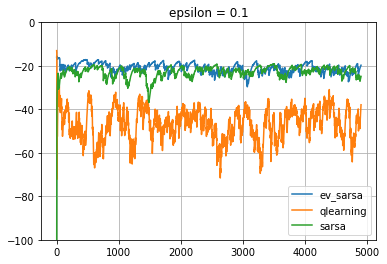

In [87]:
from IPython.display import clear_output
from pandas import DataFrame


def moving_average(x, span=100): return DataFrame(
    {'x': np.asarray(x)}).x.ewm(span=span).mean().values


rewards_evsarsa, rewards_ql,rewards_sarsa = [], [],[]

for i in range(5000):
    rewards_evsarsa.append(play_and_train(env, agent_evsarsa))
    rewards_ql.append(play_and_train(env, agent_ql))
    rewards_sarsa.append(play_and_train_sarsa(env, agent_sarsa))
    # Note: agent.epsilon stays constant

    if i % 100 == 0:
        clear_output(True)
        print('EVSARSA mean reward =', np.mean(rewards_evsarsa[-100:]))
        print('QLEARNING mean reward =', np.mean(rewards_ql[-100:]))
        print('SARSA mean reward =', np.mean(rewards_sarsa[-100:]))
        plt.title("epsilon = %s" % agent_ql.epsilon)
        plt.plot(moving_average(rewards_evsarsa), label='ev_sarsa')
        plt.plot(moving_average(rewards_ql), label='qlearning')
        plt.plot(moving_average(rewards_sarsa), label='sarsa')
        plt.grid()
        plt.legend()
        plt.ylim(-100, 0)

        plt.show()

### Visualizing the Actions for each State
Let's now see what did the algorithms learn by visualizing their actions at every state.

In [88]:
def draw_policy(env, agent):
    """ Prints CliffWalkingEnv policy with arrows. Hard-coded. """
    n_rows, n_cols = env._cliff.shape

    actions = '^>v<'

    for yi in range(n_rows):
        for xi in range(n_cols):
            if env._cliff[yi, xi]:
                print(" C ", end='')
            elif (yi * n_cols + xi) == env.start_state_index:
                print(" X ", end='')
            elif (yi * n_cols + xi) == n_rows * n_cols - 1:
                print(" T ", end='')
            else:
                print(" %s " %
                      actions[agent.get_best_action(yi * n_cols + xi)], end='')
        print()

In [89]:
print("Q-Learning")
draw_policy(env, agent_ql)

print("EVSARSA")
draw_policy(env, agent_evsarsa)

print("SARSA")
draw_policy(env, agent_sarsa)

Q-Learning
 ^  v  v  v  >  >  v  >  v  v  v  v 
 >  >  >  >  >  >  >  >  >  >  >  v 
 >  >  >  >  >  >  >  >  >  >  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 
EVSARSA
 >  >  >  >  >  >  >  >  >  >  >  v 
 >  >  >  >  >  >  >  >  >  >  >  v 
 ^  ^  ^  ^  ^  ^  ^  ^  ^  ^  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 
SARSA
 >  >  >  >  >  >  >  >  >  >  >  v 
 >  ^  ^  ^  ^  ^  >  >  ^  ^  >  v 
 ^  ^  ^  ^  >  ^  ^  ^  ^  ^  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 
